In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_excel('data v.1.2.xlsx')

In [28]:
df.head()

,Date,Machine_ID,Hydraulic_Pressure(bar),Hydraulic_Status_ID,Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Temp_Status_ID,Spindle_Vibration,Spindle_Status_ID,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Cutting_Status_ID,Downtime
0,2021-12-31,Makino-L1-Unit1-2013,71.04,1,6.933725,6.284965,25.6,46.0,33.4,2,1.291,4,26.492,25892,335,24.055326,3.58,4,Machine_Failure
1,2021-12-31,Makino-L1-Unit1-2013,125.33,3,4.936892,6.196733,35.3,47.4,34.6,2,1.382,4,25.274,19856,368,14.202890,2.68,2,Machine_Failure
2,2021-12-31,Makino-L3-Unit1-2015,71.12,1,6.839413,6.655448,13.1,40.7,33.0,2,1.319,4,30.608,19851,325,24.049267,3.55,4,Machine_Failure
3,2022-05-31,Makino-L2-Unit1-2015,139.34,4,4.574382,6.560394,24.4,44.2,40.6,4,0.618,1,30.791,18461,360,25.860029,3.55,4,Machine_Failure
4,2022-03-31,Makino-L1-Unit1-2013,60.51,1,6.893182,6.141238,4.1,47.3,31.4,1,0.983,2,25.516,26526,354,25.515874,3.55,4,Machine_Failure


In [ ]:
df.isnull().sum()

,0
Date,0
Machine_ID,0
Hydraulic_Pressure(bar),0
Hydraulic_Status_ID,0
Coolant_Pressure(bar),0
Air_System_Pressure(bar),0
Coolant_Temperature,0
Hydraulic_Oil_Temperature,0
Spindle_Bearing_Temperature,0
Spindle_Temp_Status_ID,0


In [29]:
df['Date'].head(10)

,Date
0,2021-12-31
1,2021-12-31
2,2021-12-31
3,2022-05-31
4,2022-03-31
5,2022-03-31
6,2022-03-31
7,2022-03-31
8,2022-03-31
9,2022-03-31


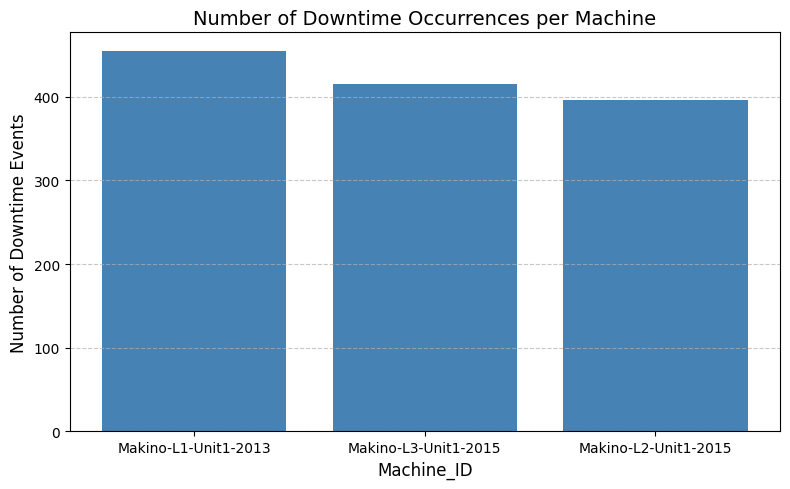

In [12]:
downtime_df = df[df['Downtime'] == 'Machine_Failure']
failure_counts = downtime_df['Machine_ID'].value_counts().reset_index()
failure_counts.columns = ['Machine_ID', 'Downtime']
machine_downtime = downtime_df.groupby(df['Machine_ID'])
plt.figure(figsize=(8,5))
plt.bar(failure_counts['Machine_ID'], failure_counts['Downtime'], color='steelblue')
plt.title('Number of Downtime Occurrences per Machine', fontsize=14)
plt.xlabel('Machine_ID', fontsize=12)
plt.ylabel('Number of Downtime Events', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

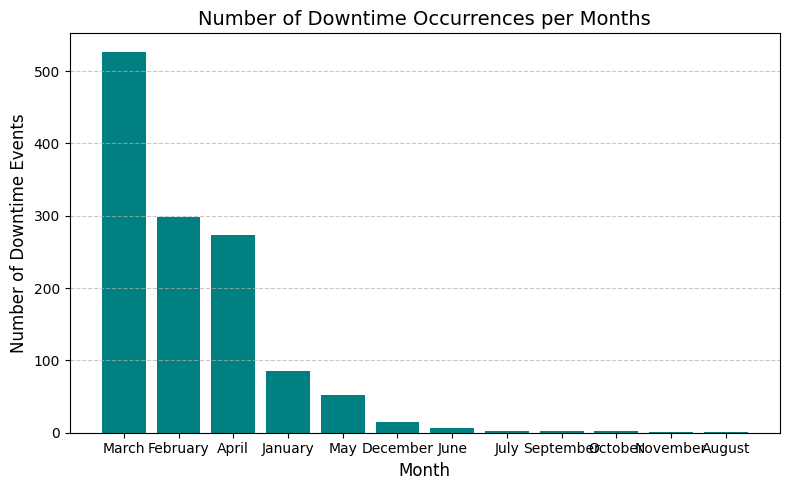

In [30]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month_name()
downtime_df = df[df['Downtime'] == 'Machine_Failure']
failure_counts_per_months = downtime_df['Month'].value_counts().reset_index()
failure_counts_per_months.columns = ['Month', 'Downtime']
plt.figure(figsize=(8,5))
plt.bar(failure_counts_per_months['Month'], failure_counts_per_months['Downtime'], color='teal')
plt.title('Number of Downtime Occurrences per Months', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Downtime Events', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

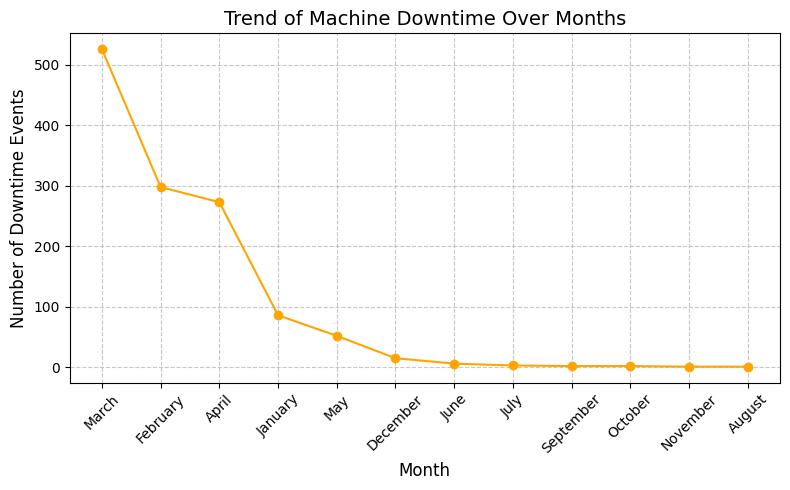

In [32]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month_name()
downtime_df = df[df['Downtime'] == 'Machine_Failure']
failure_counts_per_months = downtime_df['Month'].value_counts().reset_index()
failure_counts_per_months.columns = ['Month', 'Downtime']
plt.figure(figsize=(8,5))
plt.plot(failure_counts_per_months['Month'], failure_counts_per_months['Downtime'], marker='o', linestyle='-', color='orange')
plt.title('Trend of Machine Downtime Over Months', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Downtime Events', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

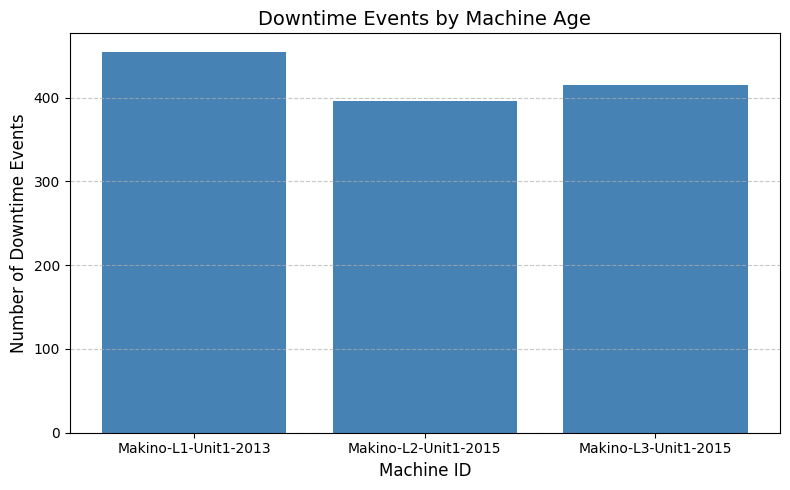

In [40]:
df['Machine_Year'] = df['Machine_ID'].str.extract(r'(\d{4})')
df['Machine_Year'] = pd.to_numeric(df['Machine_Year'], errors='coerce')
downtime_df = df[df['Downtime'] == 'Machine_Failure']
downtime_counts = downtime_df.groupby(['Machine_ID', 'Machine_Year']).size().reset_index(name='Downtime_Count')
age_downtime = downtime_df['Machine_Year'].value_counts().reset_index()
age_downtime.columns = ['Machine_Year', 'Downtime']
plt.figure(figsize=(8,5))
plt.bar(downtime_counts['Machine_ID'], downtime_counts['Downtime_Count'], color='steelblue')
plt.title('Downtime Events by Machine Age', fontsize=14)
plt.xlabel('Machine ID', fontsize=12)
plt.ylabel('Number of Downtime Events', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()